In [14]:
import pandas as pd

### [1] 데이터 준비 및 분석

In [15]:
FILE='../data/car_price_prediction.csv'
carDF = pd.read_csv(FILE)

In [16]:
carDF.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [17]:
carDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [18]:
carDF.shape

(19237, 18)

In [19]:
# describe()
carDF.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [20]:
carDF.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

### [2] 전처리

In [21]:
carDF.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [22]:
# ID는 차량의 고유번호 중복되는 번호가 있는것같아서 개수 확인 313개
carDF['ID'].duplicated().sum()

313

In [23]:
# 관세 확인 - 세금이 없다는 뜻인데 세금이 없을리가 없고 Exempt는 세금이 면제되었다는 뜻
carDF['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

In [24]:
carDF['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

In [25]:
carDF['Engine volume'].value_counts()

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

In [26]:
carDF['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

### 쓸모없는 컬럼 삭제 및 정리

In [27]:
carDF.drop(['ID', 'Color', 'Drive wheels', 'Wheel'], axis=1, inplace=True)

In [28]:
# levy(관세)컬럼의 값을 숫자형으로 변환 NONE값을 결측치로 대체
carDF['Levy']=pd.to_numeric(carDF['Levy'], errors = 'coerce')

In [29]:
# 차량이 운행된 거리 Mileage에 km를 떼고 실수형으로 바꿔줘야함
carDF['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 19237, dtype: object

In [30]:
# 조건부 표현식으로 앞쪽에있는 숫자만 바로 float형태로 변환
carDF['Mileage']= [float(value.split(' ')[0]) for value in carDF['Mileage']]

In [31]:
carDF['Mileage']

0        186005.0
1        192000.0
2        200000.0
3        168966.0
4         91901.0
           ...   
19232    300000.0
19233    161600.0
19234    116365.0
19235     51258.0
19236    186923.0
Name: Mileage, Length: 19237, dtype: float64

In [32]:
# 엔진 부피: 리터 단위로 측정되는 자동차 엔진의 부피 또는 크기.
carDF['Engine volume']

0              3.5
1                3
2              1.3
3              2.5
4              1.3
           ...    
19232    2.0 Turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: Engine volume, Length: 19237, dtype: object

In [33]:
# Turbo 이런 문자열들을 분리
# 띄어쓰기를 기준으로 문자열 분리 후 0번 인덱스만 가져온뒤 실수형으로 면환
carDF['Engine volume'] = [float(value.split(' ')[0]) for value in carDF['Engine volume']]
carDF['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64

In [34]:
# 차 문 개수
carDF['Doors']

0        04-May
1        04-May
2        04-May
3        04-May
4        04-May
          ...  
19232    02-Mar
19233    04-May
19234    04-May
19235    04-May
19236    04-May
Name: Doors, Length: 19237, dtype: object

In [35]:
carDF['Doors'].replace({'02-Mar': '2-3', '04-May': '4-5'}, inplace=True)
carDF['Doors']

0        4-5
1        4-5
2        4-5
3        4-5
4        4-5
        ... 
19232    2-3
19233    4-5
19234    4-5
19235    4-5
19236    4-5
Name: Doors, Length: 19237, dtype: object

In [36]:
carDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              13418 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float64
 9   Mileage           19237 non-null  float64
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Doors             19237 non-null  object 
 13  Airbags           19237 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 2.1+ MB


<AxesSubplot: >

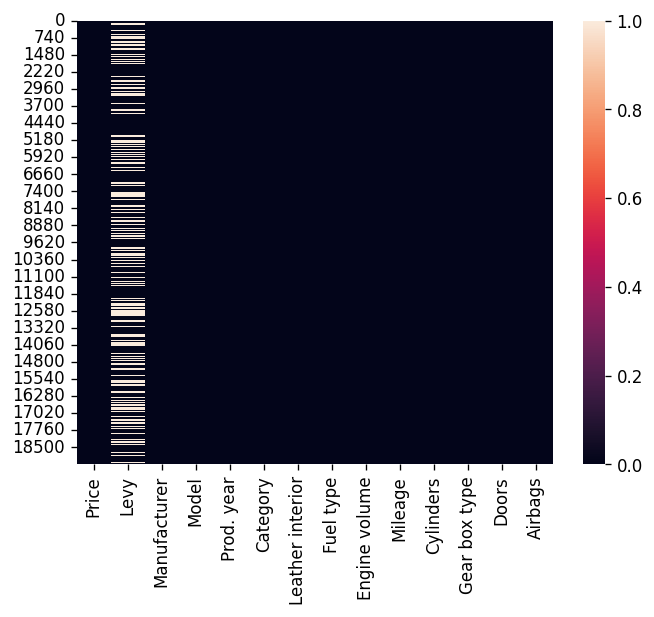

In [37]:
# 결측치가 있는 셀은 히트맵 그려서 밝은색으로 표시하기
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(dpi=120) # dpi 해상도 높이기 신기해
sns.heatmap(carDF.isna())

In [38]:
# 중복된 행이 있는지 검사하고 개수 확인하기 3512개의 값이 중복됨
duplicate_rows = carDF[carDF.duplicated()]
# 중복된 행의 개수      , 중복된 행번호
duplicate_rows.shape[0], duplicate_rows

(3523,
        Price    Levy   Manufacturer    Model  Prod. year Category  \
 192      314  1053.0  MERCEDES-BENZ    E 350        2014    Sedan   
 239     2901   503.0          HONDA    Civic        2012    Sedan   
 264      392  1017.0  MERCEDES-BENZ    E 300        2017    Sedan   
 331      282   289.0           FORD   Escape        2008     Jeep   
 347    39829  1811.0          LEXUS   GX 460        2010     Jeep   
 ...      ...     ...            ...      ...         ...      ...   
 19222  10036   639.0        HYUNDAI   Sonata        2014    Sedan   
 19227  29793  1053.0  MERCEDES-BENZ    E 350        2014    Sedan   
 19228    706  1850.0  MERCEDES-BENZ    E 350        2008    Sedan   
 19231   5802  1055.0  MERCEDES-BENZ    E 350        2013    Sedan   
 19235   5331  1288.0      CHEVROLET  Captiva        2007     Jeep   
 
       Leather interior Fuel type  Engine volume   Mileage  Cylinders  \
 192                Yes    Diesel            3.5  149486.0        6.0   
 239 

In [39]:
# 중복 제거
carDF.drop_duplicates(inplace=True)

In [40]:
# 잘 제거되었나 확인해보기
duplicate_rows = carDF[carDF.duplicated()]
duplicate_rows.shape[0], duplicate_rows

(0,
 Empty DataFrame
 Columns: [Price, Levy, Manufacturer, Model, Prod. year, Category, Leather interior, Fuel type, Engine volume, Mileage, Cylinders, Gear box type, Doors, Airbags]
 Index: [])

In [41]:
# 500보다 작은값 확인하기 -> 값이 너무 작아 삭제해도 될까?
count = carDF[carDF['Price'] < 500]['Price'].count()
count

917

In [42]:
# 인덱스 새로 부여하기
carDF.reset_index(inplace=True)
carDF.drop('index', axis=1, inplace=True)

In [43]:
carDF.head(30)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4-5,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4-5,8
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,4-5,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4-5,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,4-5,4
5,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,4-5,4
6,1803,761.0,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909.0,4.0,Automatic,4-5,12
7,549,751.0,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118.0,4.0,Automatic,4-5,12
8,1098,394.0,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069.0,4.0,Automatic,4-5,12
9,26657,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500.0,6.0,Automatic,4-5,12


In [44]:
# 값들의 기초통계량 확인해보기
carDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,15714.0,2.028702e+04,2.107120e+05,1.0,7527.00,14269.0,23382.75,2.630750e+07
Levy,10037.0,8.792066e+02,4.586749e+02,87.0,640.00,779.0,1018.00,1.171400e+04
Prod. year,15714.0,2.010520e+03,6.011911e+00,1939.0,2008.00,2012.0,2014.00,2.020000e+03
Engine volume,15714.0,2.213065e+00,8.060512e-01,0.0,1.70,2.0,2.50,2.000000e+01
Mileage,15714.0,1.837698e+06,5.355119e+07,0.0,66754.75,121000.0,180000.00,2.147484e+09
Cylinders,15714.0,4.483645e+00,1.134675e+00,1.0,4.00,4.0,4.00,1.600000e+01
Airbags,15714.0,6.544228e+00,4.068119e+00,0.0,4.00,6.0,12.00,1.600000e+01


### 히트맵의 관세 처리하기 ---------------

In [45]:
# 관세의 결측값이 굉장히 많음
levy_missing = carDF['Levy'].isna().sum()
levy_missing

5677

C:\Users\USER\AppData\Local\Temp\ipykernel_7832\4194589017.py:6: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(carDF['Levy'], kernel='gau')


<AxesSubplot: xlabel='Levy', ylabel='Density'>

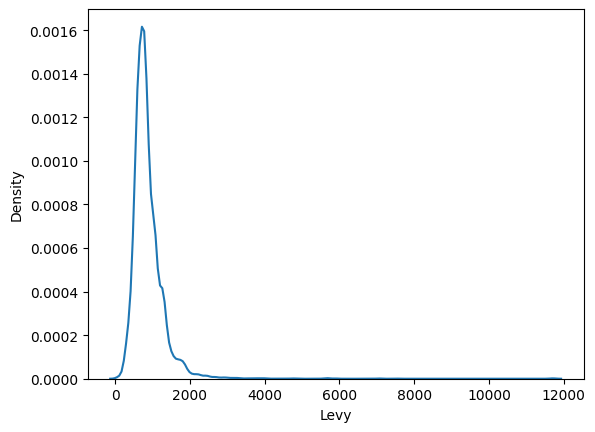

In [46]:
# KDE는 커널 밀도 추정을 사용 해볼까?
# 값의 분포를 확인하려고 그래프 그리기
# 가우시안 커널 함수를 사용하여 그래프를 그렸는데 아주 뾰쪽
# 값들이 중앙에 데이터가 밀집되어있다

sns.kdeplot(carDF['Levy'], kernel='gau')

In [47]:
# 관세를 중앙값으로 대체하기
carDF['Levy'].fillna(carDF['Levy'].median(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_7832\4128400698.py:2: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(carDF['Levy'], kernel='gau')


<AxesSubplot: xlabel='Levy', ylabel='Density'>

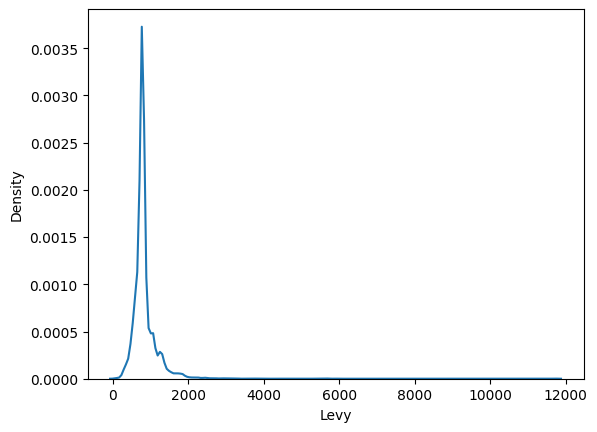

In [48]:
# 다시 그려서 값의 분포 확인해보기 => 크게 달라진게 없음, 만족
sns.kdeplot(carDF['Levy'], kernel='gau')

In [49]:
# 이상치 처리하는 함수 생성
def remove_outlier(data, columns):
    
    for col in columns:
        # ==== IQR계산====
        # 1사분위수
        q1 = data[col].quantile(0.25)
        # 3사분위수
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        
        # 이전의 계산된 열의 요소의 값이 이전에 계산된 하한값보다 낮거나 
        # 상한값보다 높은지 확인
        for i in range(carDF.shape[0]):
            if data[col][i] < lower_bound:
                data[col][i] = lower_bound
            elif data[col][i] > upper_bound:
                data[col][i] = upper_bound
            else:
                continue
    return data

In [50]:
# object인 열을 삭제하고 수치형만 반환하는 함수
def remove_obj_col(data):
    obj = list(data.select_dtypes('object').columns)
    lst = list(data.columns)
    for col in obj:
        lst.remove(col)
    return lst

In [51]:
# 복사본 - 훈련된 모델과 이상치 처리된 데이터 비교용
# 원본데이터 회손 방지 + 모델의 성능에 영향을 안주려고
carDF2= carDF.copy()

In [52]:
# 함수에 넣어서 이상치 처리하기
carDF = remove_outlier(carDF, remove_obj_col(carDF))

C:\Users\USER\AppData\Local\Temp\ipykernel_7832\2391354335.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound
C:\Users\USER\AppData\Local\Temp\ipykernel_7832\2391354335.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = lower_bound


In [53]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split

In [54]:
# 범주형 열에 레이블 인코딩 적용
obj_col = carDF.select_dtypes('object').columns
for col in obj_col:
    le = LabelEncoder()
    carDF[col] = le.fit_transform(carDF[col])

In [55]:
carDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15714 entries, 0 to 15713
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15714 non-null  float64
 1   Levy              15714 non-null  float64
 2   Manufacturer      15714 non-null  int32  
 3   Model             15714 non-null  int32  
 4   Prod. year        15714 non-null  int64  
 5   Category          15714 non-null  int32  
 6   Leather interior  15714 non-null  int32  
 7   Fuel type         15714 non-null  int32  
 8   Engine volume     15714 non-null  float64
 9   Mileage           15714 non-null  float64
 10  Cylinders         15714 non-null  float64
 11  Gear box type     15714 non-null  int32  
 12  Doors             15714 non-null  int32  
 13  Airbags           15714 non-null  int64  
dtypes: float64(5), int32(7), int64(2)
memory usage: 1.3 MB


In [56]:
carDF.head(15)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Airbags
0,13328.000,1040.5,32,1242,2010,4,1,2,3.5,186005.000,4.0,0,1,12
1,16621.000,1018.0,8,658,2011,4,0,5,3.0,192000.000,4.0,2,1,8
2,8467.000,779.0,21,684,2006,3,0,5,1.3,200000.000,4.0,3,1,2
3,3607.000,862.0,16,661,2011,4,1,2,2.5,168966.000,4.0,0,1,0
4,11726.000,564.5,21,684,2014,3,1,5,1.3,91901.000,4.0,0,1,4
5,39493.000,891.0,23,1305,2016,4,1,1,2.0,160931.000,4.0,0,1,4
6,1803.000,761.0,58,1154,2010,3,1,2,1.8,258909.000,4.0,0,1,12
7,549.000,751.0,23,1334,2013,9,1,5,2.4,216118.000,4.0,0,1,12
8,1098.000,564.5,58,435,2014,9,1,2,2.5,349867.875,4.0,0,1,12
9,26657.000,779.0,32,1235,2007,4,1,5,3.5,128500.000,4.0,0,1,12


### 스케일링

In [57]:
type(carDF)

pandas.core.frame.DataFrame

In [58]:
# Price열을 제외한 모든 열을 포함
no_p = carDF.drop(['Price'], axis=1).values
#                            ---- => 까먹지말자 열삭제 
yes_p = carDF['Price'].values
#                      ------- => 시리즈를 numpy 배열로 변환하자
no_p = MinMaxScaler().fit_transform(no_p)

In [59]:
no_p

array([[1.        , 0.5       , 0.78162366, ..., 0.        , 0.5       ,
        0.75      ],
       [0.95273109, 0.125     , 0.41409692, ..., 0.66666667, 0.5       ,
        0.5       ],
       [0.45063025, 0.328125  , 0.43045941, ..., 1.        , 0.5       ,
        0.125     ],
       ...,
       [0.55987395, 0.359375  , 0.83952171, ..., 0.66666667, 0.5       ,
        0.5       ],
       [0.57037815, 0.359375  , 0.90748899, ..., 0.        , 0.5       ,
        0.25      ],
       [0.3960084 , 0.359375  , 0.83952171, ..., 0.        , 0.5       ,
        0.75      ]])

In [60]:
# 모듈 로딩
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [61]:
x_train, x_test, y_train, y_test = train_test_split(no_p, yes_p, test_size=0.25, random_state=5)

In [62]:
# 모델들 리스트에

lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 'auto')
ada = AdaBoostRegressor( n_estimators=150, learning_rate =.08)
gbr = GradientBoostingRegressor(max_depth=7, n_estimators=500, learning_rate =.05)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),
              ('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr)]

In [63]:
for regressor_name, regressor in regressors:

    regressor.fit(x_train, y_train)    
  
    y_pred = regressor.predict(x_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))

Linear Regression : 32 %
K Nearest Neighbours : 63 %
Decision Tree : 45 %


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Random Forest : 73 %
AdaBoost : 42 %
Gradient Boosting Regressor : 73 %


## Random Forest가 가장 높음 하이퍼 파라미터 설정해서 다시 돌려보자

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
# 하이퍼 파라미터 범위지정
param_grid = {'n_estimators': [50, 100, 200],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [10, 20, 30, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

In [66]:
# 무작위로 검색수행
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42,
                               n_jobs = -1)

In [67]:
# fit하기
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(max_features='auto'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [68]:
# 최적의 파라미터 출력하기이
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [69]:
rf  = RandomForestRegressor(n_estimators = 200,
                            min_samples_split = 5,
                            min_samples_leaf = 1,
                            max_features = 'sqrt',
                            max_depth = 30,
                            bootstrap = False)

In [70]:
# 최적의 하이퍼파라미터 써서 다시 넣어보기
rf.fit(x_train, y_train)


RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      min_samples_split=5, n_estimators=200)

In [71]:
x_train[0]

array([0.45063025, 0.625     , 0.06670862, 0.        , 0.3       ,
       0.        , 0.83333333, 0.15625   , 0.71455546, 0.        ,
       0.33333333, 0.5       , 0.        ])

In [72]:
import joblib
joblib.dump(rf, 'my_model.pkl')

['my_model.pkl']

In [73]:
# 예측
y_pred = rf.predict(x_test)
y_pred

array([11267.575625  ,  5631.8925    , 20685.05947917, ...,
        6060.84833333, 23971.3603125 , 10131.89125   ])

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [75]:
# 분산비율 
accuracy = round(r2_score(y_test,y_pred),2)*100
accuracy

74.0

In [76]:
# 예측
rf.predict([[779.0,	21,	684, 2006, 3, 0, 5,	1.3, 200000.000, 4.0, 3, 1, 2]])
    

array([28888.12661458])

In [77]:
carDF.head(15)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Doors,Airbags
0,13328.000,1040.5,32,1242,2010,4,1,2,3.5,186005.000,4.0,0,1,12
1,16621.000,1018.0,8,658,2011,4,0,5,3.0,192000.000,4.0,2,1,8
2,8467.000,779.0,21,684,2006,3,0,5,1.3,200000.000,4.0,3,1,2
3,3607.000,862.0,16,661,2011,4,1,2,2.5,168966.000,4.0,0,1,0
4,11726.000,564.5,21,684,2014,3,1,5,1.3,91901.000,4.0,0,1,4
5,39493.000,891.0,23,1305,2016,4,1,1,2.0,160931.000,4.0,0,1,4
6,1803.000,761.0,58,1154,2010,3,1,2,1.8,258909.000,4.0,0,1,12
7,549.000,751.0,23,1334,2013,9,1,5,2.4,216118.000,4.0,0,1,12
8,1098.000,564.5,58,435,2014,9,1,2,2.5,349867.875,4.0,0,1,12
9,26657.000,779.0,32,1235,2007,4,1,5,3.5,128500.000,4.0,0,1,12
